# HW 9 Problem 1 and Problem 2
## Austin Marga

# Problem 1

I wanted to do something kind of neat for my experiment, so I recorded my acceleration in *PhyPhox* as I went from my car parked in the UB Fronczak Lot to my apartment on Sweet Home Road. I live about 1.1 miles away, so I wanted to see how far I actually travelled with respect to my net displacement. For instance, how efficient am I being compared to if I was emperor of the world and I could pave a direct path from my parking space in the Fronczak Lot to my apartment complex. If my total distance travelled is double the actual displacement, then I am 50% efficient.

In [1]:
import pandas as pd
import scipy.integrate as integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The name of my data file is *UBPath.csv*. It's a farily large csv file.

In [2]:
filename  = "UBPath.csv"
data = pd.read_csv(filename)

Let's just plot the acceleration vs. time graph for fun.

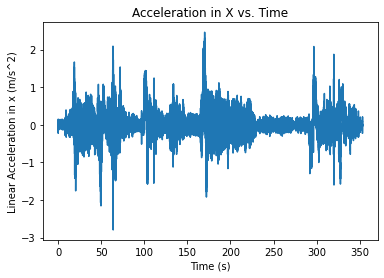

In [3]:
data
plt.plot(data["Time (s)"], data["Linear Acceleration x (m/s^2)"])
plt.xlabel("Time (s)")
plt.ylabel("Linear Acceleration in x (m/s^2)")
plt.title("Acceleration in X vs. Time")
plt.show()

Next, we need to do a few things.
- First, take each row from the `DataFrame` and send it to `numpy`.
- Second, find the average velocity of my trip by integrating the acceleration vs. time data. $v_{avg} = \int_{t_i}^{t_f} a(t)dt$
- Third, calculate the distances travelled with $d = v_{avg}t$
- Fourth, put in my print statements and calculate my efficiency.
- Fifth, profit.

In [4]:
est = 1.1
a_x = data["Linear Acceleration x (m/s^2)"].to_numpy()
a_y = data["Linear Acceleration y (m/s^2)"].to_numpy()
a_z = data["Linear Acceleration z (m/s^2)"].to_numpy()
t = data["Time (s)"]
t = t.to_numpy()
type(t)
v_x = integrate.simps(a_x,t)
v_y = integrate.simps(a_y,t)
v_z = integrate.simps(a_z,t)
d_x = v_x*(t[-1]-t[0])
d_y = v_y*(t[-1]-t[0])
d_z = v_z*(t[-1]-t[0])
d_tot = sqrt(d_x**2 + d_y**2 + d_z**2)
d_mi = d_tot / 1609
eff = est*100 / d_mi
print("You travelled to total distance of {} miles.".format(round(d_mi,2)))
print("You estimated your total travel to be {} miles, which means your driving was {}% straight to your destination."
      .format(est,round(eff,2)))

You travelled to total distance of 2.46 miles.
You estimated your total travel to be 1.1 miles, which means your driving was 44.69% straight to your destination.


It looks rather consolidated and simple in this view. Now, lets push this all into a method and test it here.

In [5]:
def total_distance(filename,est):
    """
    Calculates the total distance and efficiency of a trip given some `PhyPhox` csv file.
    
    Inputs:
    filename - Name of the csv file. Include the .csv extension. (str)
    est - The estimated net displacement from starting to ending location. (float)
    
    Returns:
    Returns the percentage efficiency of your trip given to the hundredths place. (float)
    
    """
    data = pd.read_csv(filename)
    a_x = data["Linear Acceleration x (m/s^2)"].to_numpy()
    a_y = data["Linear Acceleration y (m/s^2)"].to_numpy()
    a_z = data["Linear Acceleration z (m/s^2)"].to_numpy()
    t = data["Time (s)"]
    t = t.to_numpy()
    v_x = integrate.simps(a_x,t)
    v_y = integrate.simps(a_y,t)
    v_z = integrate.simps(a_z,t)
    d_x = v_x*(t[-1]-t[0])
    d_y = v_y*(t[-1]-t[0])
    d_z = v_z*(t[-1]-t[0])
    d_tot = sqrt(d_x**2 + d_y**2 + d_z**2)
    d_mi = d_tot / 1609
    eff = est*100 / d_mi
    print("You travelled to total distance of {} miles.".format(round(d_mi,2)))
    print("You estimated your total travel to be {} miles, which means your driving was {}% straight to your destination."
          .format(est,round(eff,2)))
    return(round(eff,2))

In [6]:
total_distance("UBPath.csv",1.1)

You travelled to total distance of 2.46 miles.
You estimated your total travel to be 1.1 miles, which means your driving was 44.69% straight to your destination.


44.69

# Problem 2

For the sake of simplicity, I am going to take the same data, but do a different "experiment" on the data. Again, one day, I hope to be ruler over the world. When I am ruler of the world, I would like to have the easiest drive from my apartment complex to my parking space in UB's Fronczak Lot (even though I likely won't be here when I rule the world, but that is besides the point). I qualify the easiest drive as **a drive that has minimizes acceleration**. Ideally, as soon as I leave to go on my route, I will start at, and continue at, 45mph until I reach my destination. So, let's determine how *cool* my current commute is with respect to my future commute. Imagine I hit no red lights and all constant velocity durations occured with a nonzero velocity.

First, for completeness, let's call the `csv` file.

In [7]:
filename  = "UBPath.csv"
data = pd.read_csv(filename)

To be truely having a *cool* ride, I want to not accelerate in any direction (future ruler me will have an underground tunnel for my commute that lets my z displacement be 0 on my trip). My threshold for having a *cool* ride is my acceleration is less than $0.10 \frac{m}{s^2}$. This equates to my speed only changing about $1$ mph every $5$ seconds, which is quite a fair bar.

Let's make all of our lists to loop through. I'm sure `pandas` to `numpy` to `python` lists is extremely painful and is not pythonic, but, it worked. :)

In [8]:
a_x = data["Linear Acceleration x (m/s^2)"].to_numpy()
a_y = data["Linear Acceleration y (m/s^2)"].to_numpy()
a_z = data["Linear Acceleration z (m/s^2)"].to_numpy()
t = data["Time (s)"]
a_x_2 = a_x.tolist()
a_y_2 = a_y.tolist()
a_z_2 = a_z.tolist()
t_2 = t.to_numpy()

Now, we loop through each entry for each list and see if the acceleration with within our bounds.

In [9]:
def loop():
    """
    Test function to coint non-accelerating points in time.
    
    Inputs: None
    
    Returns: Returns the total amount of points that there was minimal acceleration. (int)
    
    """
    points = 0
    for entry in range(0,len(a_x_2)):
        if (-0.10 < a_x_2[entry] < 0.10) and (-0.10 < a_y_2[entry] < 0.10) and (-0.10 < a_z_2[entry] < 0.10) :
            points = points + 1
    return points

In [10]:
points = loop()
time_per_point = (t_2[-1] - t_2[0]) / len(t)
coast_time = points * time_per_point / 60
coast_eff = coast_time / (t_2[-1] - t_2[0]) * 6000
coast_time = round(coast_time,2)
coast_eff = round(coast_eff,2)
print("Your total coast time was {} minutes. You were coasting approximately {}% of the time.".format(coast_time,coast_eff))

Your total coast time was 0.57 minutes. You were coasting approximately 9.71% of the time.


Now, let's build our method.

In [11]:
def coast_time(filename):
    """
    Calculates the length of minimal acceleration or coasting and the percentage of the trip that involved coasting.
    
    Inputs: 
    filename - Name of the csv file. Include the .csv extension. (str)
    
    Returns:
    Returns the percentage that you coasted on your trip to the hundredths place. (float)
    
    """
    data = pd.read_csv(filename)
    a_x = data["Linear Acceleration x (m/s^2)"].to_numpy()
    a_y = data["Linear Acceleration y (m/s^2)"].to_numpy()
    a_z = data["Linear Acceleration z (m/s^2)"].to_numpy()
    t = data["Time (s)"]
    a_x_2 = a_x.tolist()
    a_y_2 = a_y.tolist()
    a_z_2 = a_z.tolist()
    t_2 = t.to_numpy()
    points = 0
    for entry in range(0,len(a_x_2)):
        if (-0.10 < a_x_2[entry] < 0.10) and (-0.10 < a_y_2[entry] < 0.10) and (-0.10 < a_z_2[entry] < 0.10) :
            points = points + 1
    time_per_point = (t_2[-1] - t_2[0]) / len(t)
    coast_time = points * time_per_point / 60
    coast_eff = coast_time / (t_2[-1] - t_2[0]) * 6000
    coast_time = round(coast_time,2)
    coast_eff = round(coast_eff,2)
    print("Your total coast time was {} minutes. You were coasting approximately {}% of the time.".format(coast_time,coast_eff))
    return round(coast_eff,2)

In [12]:
coast_time("UBPath.csv")

Your total coast time was 0.57 minutes. You were coasting approximately 9.71% of the time.


9.71